# Project 02 - Wrangle and Analyze Data

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Project: Wrangle and Analyze Data  
Course: Data Science - Foundations II  
COD: ND111  
Date: 26/12/2018    
Version: 1.0

***

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#gathering">2. Data Gathering</a></li>
<li><a href="#assessing">3. Data Assessing</a></li>
<li><a href="#cleaning">4. Data Cleaning</a></li>
<li><a href="#references">6. References</a></li>
<li><a href="#appendix">Appendix</a></li>
</ul>

***

## Synopsis


***

## 1. Introduction  <a id='intro'></a>

This Jupyter Notebook aims to document the process of Gathering, Assessing, and Cleaning of Data Science Foundations II Nanodegree Program Project 02.


### 1.1. Reproducibility

I have written this report using the Jupyter Notebook, which will allow anyone to reproduce this document in a local computer. I have made a great effort to document every step to turn this document understabable. 

#### Work envinronment

I have performed this project using:

* Dell Notebook Inspiron 7348;
* Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz 2.40GHz;
* 8.00 GB, and;
* Windows 10 Pro 64-bits.

#### Softwares

There are few requirements to reproduce this project, which could be regular web Browser. I have written the Jupyter Notebook using Opera.

* Python (version 3.7.0);
* Jupyter Notebook (version 5.6.0);
* Opera (version 57.0.3098.106), and;
* Atom (version 1.33.1 ia32).

I have used the Atom to push to Github repository and to visualize some files, and nothing more than this.

#### Packages

I kindly ask you to install each of this packages before you run the next steps.

* pandas (version 0.23.4);
* requests (version 2.20.1), and;
* tweepy (version 3.7.0).

#### Repository

You can access all files of this report in this repository:

* https://github.com/AndersonUyekita/ND111_data_science_foundations_02


### 1.2. Importing Libraries

For this project I will use some libraries to manage data frames, download file, Twitter API Client code, etc.. Let's import this packages to the Jupyter Notebook environment.

In [1]:
# Importing Library.

# Importing pandas to work with DataFrames.
import pandas as pd

# Importing numpy to general methods.
import numpy as np

# Importing OS package to write and open files.
import os

# Importing the requests to create a object from a given URL.
import requests

# Importing the Client Code to use the Twitter API.
import tweepy

# Importing the json package to easy my task with json files
import json

# Importing the time package to calculate the elapse time to access the Twitter API
import time

# Importing the re package to use the regular expressions.
import re

***

## 2. Data Gathering <a id='gathering'></a>

There are two (2) files hosted in Udacity website that I must have to gather (download).

* `image-predictions-3.tsv`, and;
* `twitter-archive-enhanced-2.csv`.

Later, I will access the Twitter API to gather additional data.

### 2.2. Downloading Files from Udacity Website

First, I will create a folder to store the data and later I will download each file.

In [2]:
# Creating a folder to store the files.
folder = "01-Dataset" # Folder's name.

# Checking if the folder already exist.
if not folder in os.listdir():
    os.mkdir(folder)  # Creating the folder when 01-Dataset do not exist.

# List of files.
list_url = ['https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv',
            'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv',
            'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv',
            'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

# Loop to download the three files hosted in Udacity website.
for url in list_url:
    if not url.split('/')[-1] in os.listdir(folder):                              # Check if the files already exist.
        response = requests.get(url)                                              # Creating an object of the given URL.
        with open(os.path.join(folder,url.split('/')[-1]), mode = 'wb') as file:  # Defining the file name.
            file.write(response.content)                                          # Saving the object.

_Obs.: As you can see, I have downloaded 4 (four) files because along the instruction I have found some links relating to the same document, but with different paths. I decided to download all files to compare the differences between each one, and fortunatelly the duplicated files are equals._


#### 2.2.1. Loading the files

Now that all file are in the local machine (stored in the `01-Dataset` folder), let's load each file into the Jupyter Notebook environment.

In [3]:
# Loading the image precictions
df_img = pd.read_csv('01-Dataset/image-predictions.tsv', sep = '\t') # tsv file need to configure the sep as tabular.

# Loading the archive of WeRateDogs.
df_ach = pd.read_csv('01-Dataset/twitter-archive-enhanced-2.csv') # regular csv file.

These two files are ready to the next step of Data Wrangling, which is called Data Assessing.

### 2.3. Twitter API

One of the Project requirements is to access the Twitter API to create the `tweet_json.txt` completing some missing/wrong values of the `tweet-json` file. I will use the `tweepy` package (a client code) to access the Twitter API.

#### Sensible Data

Please, fill with your own `consumer_key`, `consumer_secret`, `access_token` and `access_secret`.

In [4]:
# Complete with your own keys and secretes.
consumer_key = 'ehsa07tcfcoYwLc0jVFzPgKWp'                               # API key
consumer_secret = 'O5ki4Y5fUFLx0x3B1IDGxPykIIeJuog3RFjCd5JlQyAie3SYy3'   # API secret key
access_token = '1077890267062194181-kGwIzRwVv99tExXXFDe80kolvbyvGi'      # Access token
access_secret = 'NbEpRgi7IvLYeXopY9vAjYFRXmqWlSD1iSRej2geBMUiT'          # Access token secret

#### OAuth Authentication

Based on the given `consumer_key`, `consumer_secret`, `access_token` and `access_secret` I will access the Twitter API.

The follow chunk of code has default configuration of the API, bear in mind, the `wait_on_rate_limit` and `wait_on_rate_limit_notify`, both are setted as `True`.

>* wait_on_rate_limit – Whether or not to automatically wait for rate limits to replenish  
>* wait_on_rate_limit_notify – Whether or not to print a notification when Tweepy is waiting for rate limits to replenish  

<em>Obs.: The excerpt was extracted from the [Tweepy website][twtpy_notes].</em>

[twtpy_notes]: http://docs.tweepy.org/en/3.7.0/api.html?highlight=wait_on_rate_limit_notify

In [5]:
# Authentication (default configuration).
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

The reason to use the Twitter API is to gather additional data and missing data from the `twitter-archive-enhanced-2.csv` file. For this reason, the strategy is find for each tweet_id the missing and the additional data.

First, I need to know the quantity of unique tweets `twitter-archive-enhanced-2.csv` have.

In [6]:
# Unique tweets of twitter-archive-enhanced-2.csv file.
u_twt_id = df_ach.tweet_id.tolist()

# Print the number of unique tweets.
len(df_ach.tweet_id.unique())

2356

The quantity probably will raise/trigger the `TweepError`, which require the API use wait some minutes to keep gathering data from Twitter.

I have also configured the `tweet_mode` to `extended`, because I want all messages without the `...`, twitter has increased the character's number from 140 to 280. 

For a deeper understanding of `_json` dictionary, please read the Appendix.

In [7]:
# Initializing the dicitionary to store the raw data from Twitter API JSON file.
dct_twt_raw = {}

# This is the list of error.
df_error = []

# Current time when the Twitter API starts.
str_loop = time.time()

# Loop to find each tweet_id of u_twt_id list.
for tweet in u_twt_id:
    # This is necessary to avoid an interruption if any tweet_id is not find.
    try:
        # The get_status will find a specific tweet_id and return all the tweet.
        twt_status = api.get_status(tweet,
                                    wait_on_rate_limit = True,         # Automatically wait for rate limits to replenish.
                                    wait_on_rate_limit_notify = True,  # Print the notification "Rate limit reached..."
                                    tweet_mode = 'extended')           # I want the full text without "...".
        # The data I want is the _json dictionary.
        dct_twt_raw[str(tweet)] = twt_status._json                     # Bear in mind, _json is a dictionary.
    # In case of a problem, a message will be printed.
    except:
        df_error.append(str(tweet))                                    # Update df_error list.
        print("tweet_id did not found: {}".format(str(tweet)))

# Current time when the Twitter API ends.
end_loop = time.time()

tweet_id did not found: 888202515573088257
tweet_id did not found: 873697596434513921
tweet_id did not found: 872668790621863937
tweet_id did not found: 869988702071779329
tweet_id did not found: 866816280283807744
tweet_id did not found: 861769973181624320
tweet_id did not found: 845459076796616705
tweet_id did not found: 842892208864923648
tweet_id did not found: 837012587749474308
tweet_id did not found: 827228250799742977
tweet_id did not found: 812747805718642688
tweet_id did not found: 802247111496568832
tweet_id did not found: 775096608509886464
tweet_id did not found: 770743923962707968


Rate limit reached. Sleeping for: 559


tweet_id did not found: 754011816964026368
tweet_id did not found: 680055455951884288


Rate limit reached. Sleeping for: 554


Unfortunately, some tweet_id was not found in `@dog_rates` database, for some reason the tweet disappeared.

I have stored this information in a separared list to use it later, when I will clean this data.

For sanity reason, I have recorded the time elapsed to gather data from Twitter API.

>_To query all of the tweet IDs in the WeRateDogs Twitter archive, 20-30 minutes of running time can be expected. Printing out each tweet ID after it was queried and using a code timer were both helpful for sanity reasons._

In [44]:
# Calculating the elapsed time in minutes.
elapsed_time = (end_loop - str_loop)/60

# Printing the elapsed time of the loop.
print("Elapsed time: {} minutes".format(round(elapsed_time,2)))

Elapsed time: 34.15 minutes


Following the project's instruction, let's create the `tweet_json.txt` file.

Bear in mind, the `dct_twt_raw` is a dictionary, and I will save it as is.

In [9]:
# Writing the tweet_json.txt in the 01-Dataset folder.
with open('01-Dataset/tweet_json.txt', mode = 'w') as file:
    json.dump(dct_twt_raw, file)

Also according to the project's instructions, I need to read the exported file (`tweet_json.txt`).

Take consideration `tweet_json.txt` file is a dictionary and I do want a DataFrame, I can use the `read_json` from pandas package to import as a DataFrame. I have also defined the `orient` as `index` to be in conformity with the definition of [tidy dataset][tidy_data] preconized by [Hadley Wickham][manifesto].

>* Each variable forms a column.
>* Each observation forms a row.
>* Each type of observational unit forms a table.

[tidy_data]: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
[manifesto]: https://cran.r-project.org/web/packages/tidyverse/vignettes/manifesto.html

In [10]:
# Loading the tweet_json.txt as a panda DataFrame.
df_twt_raw = pd.read_json('01-Dataset/tweet_json.txt', orient = 'index') # Atention to the orient defined as index.

# Printing the first 2 rows.
df_twt_raw.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38091,0,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8330,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32682,0,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6154,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Finally, I have gathered the all three datasets:

* `tweet_json.txt` as `df_twt_raw`;
* `image-predictions.tsv` as `df_img`, and;
* `twitter-archive-enhanced-2.csv` as `df_ach`.

***

## 3. Data Assessing <a id='assessing'></a>

This section aims to identify issues in all datasets from this project. In accordance with the Lesson 03, the issues could be defined into two types:

* Quality issues: Dirty data;
    * Missing, duplicated, or incorrect data;
* Lack of tidiness: Also known as messy data;
    * Strucutural issues.

### 3.1. Objectivies

Project Requirements extracted from the project rubric.

>_At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each._

### 3.2. Methodology

I will perform a straighforward assessment.

* Detect, and;
* Document.

So, for each dataset I will point out all problem I have detected, and later in the Data Cleaning process I will clean and fix these issues.

### 3.3. twitter_archive_enhanced.csv

I have loaded this archive as `df_ach`. I will start to analyze this archive using the traditional visual assessment using the `.head()` and `.tail()` methods.

### `.head()`

In [11]:
# Print the first 5 rows of the data set.
df_ach.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### `.tail()`

In [12]:
# Print the last 5 rows of the data set.
df_ach.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


As a result of the `.head()` and `.tail()` methods, I can point out the follow issues recorded in **Table 1**.  

<br>

<center><strong>Table 1 - Issues identified visually in twitter_archive_enhanced.csv.</strong></center>

|Issue ID|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|name|Invalid names due to a poor regex to map names.|
|2|Tidiness|-|Visual|source|HTML tags, URL, and content in a single column.|

I have found some weird names, which require a deeper analysis using the `.value_counts()` method to see the recurrency of this error. 

### `.value_counts()`

In [13]:
# What is the most commom name to a Dog!?
df_ach.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Toby          7
Bailey        7
Daisy         7
Buddy         7
Jax           6
Rusty         6
Oscar         6
Dave          6
Scout         6
Stanley       6
Koda          6
Jack          6
Milo          6
Leo           6
Bella         6
Larry         5
           ... 
Divine        1
Ruffles       1
Cilantro      1
Jiminus       1
light         1
Raphael       1
Sky           1
Emanuel       1
Reagan        1
Flurpson      1
Dutch         1
Rumpole       1
Stuart        1
Mya           1
Ester         1
Robin         1
Rascal        1
Bode          1
Lillie        1
Corey         1
Harlso        1
Spanky        1
Ronduh        1
Howie         1
Harry         1
Willow        1
Fido          1
Filup         1
Kobe          1
Anna          1
Name: name, Length: 957,

The `.value_counts()` method applied to the `name`'s columns shows a higher number of weird and probably wrong dogs names.

* 55 occurencies of a;
* 8 occurencues of the;
* 7 occurrencies of an, etc.

This ensure the problem already identified visualy.

Let's deep in the `rating_denominator` and `rating_numerator`.

In [14]:
# What is the most commom denominator. I guess it must be 10.
df_ach.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# In the past @dog_rates used to rate with grades between 0 to 10.
df_ach.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

As you can see, both columns have problems in some observations. Table 2 summarizes the issues.

<br>

<center><strong>Table 2 - Issues identified visually and programmatically in twitter_archive_enhanced.csv.</strong></center>

|Issue ID|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|name|Invalid names due to a poor regex to map names.|
|2|Tidiness|-|Visual|source|HTML tags, URL, and content in a single column.|
|3|Quality|Validity|Programmatic|rating_numerator|Invalid ratings. Value varies from 1776 to 0.<br>Data Strucutre must be converted from `int` to `float`.|
|4|Quality|Validity|Programmatic|rating_denominator|Invalid denominator, I expected a fixed base.<br>Data Strucutre must be converted from `int` to `float`.|

### `.info()`

In [16]:
# An overview of the df_ach.
df_ach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The `.info()` method provide a good overview of each column, which allow me to identify latents issues. Table 3 aggregates these new issues.

<br>

<center><strong>Table 3 - Issues identified visually and programmatically in twitter_archive_enhanced.csv.</strong></center>

|Issue ID|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|name|Invalid names or non-standard names.|
|2|Tidiness|-|Visual|source|HTML tags, URL, and content in a single column.|
|3|Quality|Validity|Programmatic|rating_numerator|Invalid ratings. Value varies from 1776 to 0.<br>Data Strucutre must be converted from `int` to `float`.|
|4|Quality|Validity|Programmatic|rating_denominator|Invalid denominator, I expected a fixed base.<br>Data Strucutre must be converted from `int` to `float`.|
|5|Tidiness|-|Programmatic|doggo, floofer, pupper, and puppo|This is a categorical variable and could be combine into one column.|
|6|Tidiness|-|Programmatic|text|There are two information in a single column. Split the text from the URL.|
|7|Quality|Validity|Programmatic|timestamp|Converted to date.|
|8|Quality|Validity|Programmatic|tweet_id|Following the example of zip code, it must be string.|
|9|Quality|Accuracy|Programmatic|retweeted_status_id|The same dog could be recorded twice or more in cases of retweets.|
|10|Quality|Accuracy|Programmatic|in_reply_to_status_id|The same dog could be recorded twice or more in cases of reply.|



The `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, and `in_reply_to_user_id` could lead a wrong results because it will duplicate the same dog each retweet or reply. For this reason, it's good to remove this `tweet_id`'s.

An example of this problem is shown below. The dog so-called "Sierra" will appears twice due to the retweet.

In [17]:
# Subsetting the df_ach to find a retweet.
df_ach[df_ach.name == 'Sierra']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


Let's take a look to the duplicated `tweet_id`.

In [18]:
# Duplicated tweet_id.
sum(df_ach.tweet_id.duplicated())

0

Although, there are no duplicated `tweet_id`, I need to be aware to the retweet, which create a new `tweet_id` for the same dog, resulting a double entries (or more).

### 3.4.  image_predictions.tsv

Analogous to the 3.3. item, I will perform the same process to the `image_predictions.tsv` file, I have stored this file in the `df_img` variable.

### `.head()`

In [19]:
# Printing the first 5 rows.
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### `.tail()`

In [20]:
# Printing the last 5 rows.
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Visually I did not find much, unless the inconsistency in the breed name, some has the first letter capitalized and other not. I will record this issue in Table 4.

<br>

<center><strong>Table 4 - Issues identified visually in image_predictions.tsv.</strong></center>

|Issue ID|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|11|Quality|Consistency|Visual|p1, p2, and p3|Dog's breed is not standardized.|


### `.info()`

In [21]:
# An overview of the df_img.
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


One more issue observed is the type of tweet_id variable. Table 5 summarize the issues found in image-predictions.tsv.

<br>

<center><strong>Table 5 - Issues identified visually and programmatically in image_predictions.tsv.</strong></center>

|Issue ID|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|11|Quality|Consistency|Visual|p1, p2, and p3|Dog's breed is not standardized.|
|12|Quality|Validity|Programmatic|tweet_id|Convert it to string.|

Let's analize the duplicated entries.

### `.duplicated()`

In [22]:
# Duplicated tweet_id.
sum(df_img.tweet_id.duplicated())

0

In [23]:
# Duplicated jpg_url.
sum(df_img.jpg_url.duplicated())

66

The `tweet_id` is an unique key to the tweet and not to the rated dog. For this reason, it is a good idea to filter for unique picture of dog, which will also remove the retweets. Table 6 summarizes the issues of the image-predictions.tsv file.

<br>

<center><strong>Table 6 - Issues identified visually and programmatically in image_predictions.tsv.</strong></center>

|Issue ID|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|11|Quality|Consistency|Visual|p1, p2, and p3|Dog's breed is not standardized.|
|12|Quality|Validity|Programmatic|tweet_id|Convert it to string.|
|13|Quality|Validity|Programmatic|jpg_url|Duplicated images and consequently double entry.|

### 3.5. Conjunctural Analysis

Based on the tidy data concept, these two tables could be merged into one, using the `tweet_id` as a mapping key.
Summarizing Table 3, Table 6, and this new issue, Table 7 is the preliminar version of the issues on all dataset of this project.

<br>

<center><strong>Table 7 - Summary of Issues Identified.</strong></center>

|Issue ID|Table|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|df_ach|Quality|Validity|Visual|name|Invalid names or non-standard names.|
|2|df_ach|Tidiness|-|Visual|source|HTML tags, URL, and content in a single column.|
|3|df_ach|Quality|Validity|Programmatic|rating_numerator|Invalid ratings. Value varies from 1776 to 0.<br>Data Strucutre must be converted from `int` to `float`.|
|4|df_ach|Quality|Validity|Programmatic|rating_denominator|Invalid denominator, I expected a fixed base.<br>Data Strucutre must be converted from `int` to `float`.|
|5|df_ach|Tidiness|-|Programmatic|doggo, floofer, pupper, and puppo|This is a categorical variable and could be combine into one column.|
|6|df_ach|Tidiness|-|Programmatic|text|There are two information in a single column. Split the text from the URL.|
|7|df_ach|Quality|Validity|Programmatic|timestamp|Converted to date.|
|8|df_ach|Quality|Validity|Programmatic|tweet_id|Following the example of zip code, it must be string.|
|9|df_ach|Quality|Accuracy|Programmatic|retweeted_status_id|The same dog could be recorded twice or more in cases of retweets.|
|10|df_ach|Quality|Accuracy|Programmatic|in_reply_to_status_id|The same dog could be recorded twice or more in cases of reply.|
|11|df_img|Quality|Consistency|Visual|p1, p2, and p3|Dog's breed is not standardized.|
|12|df_img|Quality|Validity|Programmatic|tweet_id|Convert it to string.|
|13|df_img|Quality|Validity|Programmatic|jpg_url|Duplicated images and consequently double entry.|
|14|twt_ach_mstr|Tidiness|-|Programmatic|-|Merging these two tables (`df_ach` and `df_img`) into one.|

Where:

* `df_ach`: twitter_archive_enhanced.csv;  
* `df_img`: image_predictions.tsv;  
* `twt_ach_mstr`: twitter_archive_master.csv, and;
* `df_twt_raw`: tweet_json.txt.


### 3.6. Iterative Process

Have in mind the Data Assessing is not a exaustive step, and neither aims to find all issues of these two tables. Probably, this step will be revisited again to find hidden issues. 

***

## 4. Data Cleaning <a id='cleaning'></a>

Founded on Table 7, let's start to fix each issue pointed out.

### 4.1. Copying

Before any edition, I will make copies of each table to keep the original without any edition.

In [459]:
# Copying the df_img.
df_img_cln = df_img.copy()

# Copying the df_ach.
df_ach_cln = df_ach.copy()

# Copying the df_twt_raw. 
df_twt_cln = df_twt_raw.copy()

I will fix the issues according to my preference, Although, I prefer to merge the tables `df_ach` and `df_img` into one and start the cleaning process, before it I need to remove the duplicated picture in `df_img`.


### 4.2. Issue ID 13

>**Issue:** Duplicated images and consequently double entry.


I will remove all duplicated images (based on the URL).

In [460]:
# Vector to indexing the duplicated jpg url.
indexing = df_img.jpg_url.duplicated()

# I want the opposite. All observations except the duplicated.
indexing = np.logical_not(indexing)

# Subsetting and assigning to the df_img cleaned.
df_img_cln = df_img_cln[indexing]

# New dimensions of df_img_cln
df_img_cln.shape

(2009, 12)

As you can see, I have removed 66 observations (the original observation's number is 2075).

### 4.3. Issue ID 9 and 10

>**Issue:** The same dog could be recorded twice or more in cases of retweets.

>**Issue:** The same dog could be recorded twice or more in cases of reply.

Following the same ideia of the Issue 14, I will remove any retweet of reply.

In [461]:
# Creating a vector to select the retweeted_status_id different of Null.
indexing = df_ach_cln.retweeted_status_id.isnull()

# Subsetting the df_ach_cln excluding the retweeted. 
df_ach_cln = df_ach_cln[indexing]

# Creating a vector to select the in_reply_to_status_id different of Null.
indexing = df_ach_cln.in_reply_to_status_id.isnull()

# Subsetting the df_ach_cln excluding the reply.
df_ach_cln = df_ach_cln[indexing]

### 4.4. Issue ID 8

> **Issue:** Following the example of zip code, it must be string.

Following the same idea from this thread of [Stack Overflow][issue13]:

>_Numbers should mean something numeric. ZIP codes don't add or subtract or participate in any numeric operations. 12309 - 12345 does not compute the distance from downtown Schenectady to my neighborhood._

I will convert the `tweet_id` to string.

[issue13]: https://stackoverflow.com/questions/893454/is-it-a-good-idea-to-use-an-integer-column-for-storing-us-zip-codes-in-a-databas

In [462]:
# Converting the tweet_id to string.
df_ach_cln.tweet_id = df_ach_cln.tweet_id.astype(str)

# Printing the info to ensure the convertion. Bear in mind, in pandas object is string. 
df_ach_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(2), object(11

### 4.5. Issue ID 12

> **Issue:** Convert `tweet_id` to string to be capable to use it as key in a merging process.

In common with Issue ID 10, I will do the same.

In [463]:
# Converting the tweet_id to string.
df_img_cln.tweet_id = df_img_cln.tweet_id.astype(str)

# Printing the info to ensure the convertion. Bear in mind, in pandas object is string. 
df_img_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 123.6+ KB


### 4.6. Issue ID 14

> **Issue:** Based on the concept of tidy data preconized by [Hadley Wickham][hadley], it is a good idea to merge these two tables.

The merging process will use the `tweet_id` as a Key.

_Obs.: Read more about merging in [Pandas Website][issue15]._

[issue15]: https://pandas.pydata.org/pandas-docs/stable/merging.html
[hadley]: http://hadley.nz

In [464]:
# Creating the twitter_archive_master.
twt_ach_mstr = pd.merge(df_ach_cln, df_img_cln, on = 'tweet_id')

# The first 5 rows of the merged table.
twt_ach_mstr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### 4.7. Issue ID 1

> **Issue:** Invalid names or non-standard names.

The expression used to track the dog's name (in other words the regular expression) is likely "This is DOG_NAME", when DOG_NAME is changed by "a funny" or "an incredible" or "very something", the expression did not "scrap" the right name. In some cases neither a name the dog has, but the expression with take whatever it lays in that position.

For this reason, I have changed every non-standard name to "None".

In [465]:
# Initialization of variable.
non_names = []

# Loop to find ordinary word.
for index in twt_ach_mstr.name:
    # Will check every name start with lowercase.
    if index.islower():
        # If yes will append to non_names.
        non_names.append(index)

# The list will filter only unique values
non_names = list(set(non_names))

# Printing non-standard names.
non_names

['actually',
 'just',
 'my',
 'this',
 'by',
 'his',
 'getting',
 'an',
 'a',
 'very',
 'incredibly',
 'infuriating',
 'such',
 'all',
 'space',
 'quite',
 'officially',
 'the',
 'unacceptable',
 'light',
 'not',
 'one']

This list of names above I classify as non-standard. Using a simple `.replace()` I can replace all non standard name to `None`.

In [466]:
# Loop to replace each non standard name (non_name).
for index in non_names:
    twt_ach_mstr.name.replace(index,
                              "None",
                              inplace = True)

### 4.8. Issue ID 2 and 6

> **Issue:** HTML tags, URL, and content in a single column.

> **Issue:** There are two information in a single column. Split the text from the URL

I will edit it because there are two informations stored in a single column.

* The name's source;
* The URL who redirect to the source (href).

_Obs.: I have read this [thread][issue2] in Stack Overflow to revise how to use the `.concat()`._

[issue2]: https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe 

In [467]:
# Creating auxiliary list to store the source and source_url.
aux_ls_sr = []
aux_ls_sr_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in twt_ach_mstr.source:
    aux_ls_sr.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
    aux_ls_sr_url.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

# Updating the source column with aux_ls_sr.
twt_ach_mstr.source = aux_ls_sr

# Appending a new column with source_url info.
twt_ach_mstr = pd.concat([twt_ach_mstr, pd.DataFrame(aux_ls_sr_url, columns = ['source_url'])], axis = 1)

# Printing the first 5 rows.
twt_ach_mstr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,http://twitter.com/download/iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,http://twitter.com/download/iphone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,http://twitter.com/download/iphone


In the same way, the `text` column (of `twt_ach_mstr`) has two informations, the text and the url in the end of the message. Let's divide this into two separeted columns.

In [468]:
# Creating auxiliary list to store the text and text_url.
aux_txt = []
aux_txt_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in twt_ach_mstr.text:
    aux_txt.append(' '.join(index.split(" ")[:-1]))
    aux_txt_url.append(index.split(" ")[-1])

# Updating the source column with aux_ls_sr.
twt_ach_mstr.text = aux_txt

# Appending a new column with source_url info.
twt_ach_mstr = pd.concat([twt_ach_mstr, pd.DataFrame(aux_txt_url, columns = ['text_url'])], axis = 1)

# Printing the first 5 rows.
twt_ach_mstr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url,text_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,http://twitter.com/download/iphone,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,http://twitter.com/download/iphone,https://t.co/AtUZn91f7f


### 4.9. Issue ID 3 and 4

> **Issue:** Invalid ratings. Value varies from 1776 to 0. Data Strucutre must be converted from int to float.

> **Issue:** Invalid denominator, I expected a fixed base. Data Strucutre must be converted from int to float.

First of all, I will convert both columns, `rating_numerator` and `rating_denominator`, from `int` to `float` because in same cases the `@dog_rates` uses `float` number to rating.

In [469]:
# Converting the tweet_id to string.
twt_ach_mstr.rating_numerator = twt_ach_mstr.rating_numerator.astype(float)
twt_ach_mstr.rating_denominator = twt_ach_mstr.rating_denominator.astype(float)

Most of the numerator values are in conformity to what I expected, but few has extreme values such 1776, 420, 204, and so on.

For this reason, I am going to subset the `twt_ach_mstr` data frame to realize what is in commom with this observations.

_Obs.: I have read this [thread][issue3] in Stack Overflow to learn about `.isin()`_

[issue3]: https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values

In [470]:
# Creating the black list
black_list = sorted(twt_ach_mstr.query('rating_numerator > 15').rating_numerator.tolist())

# Let's subset the twt_ach_mstr using the .isin() method.
twt_ach_mstr[twt_ach_mstr.rating_numerator.isin(black_list)][['tweet_id','text']]

,tweet_id,text
320,820690176645140481,The floofs have been released I repeat the flo...
382,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...
499,786709082849828864,"This is Logan, the Chow who lived. He solemnly..."
549,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...
658,758467244762497024,Why does this never happen at my front door......
722,749981277374128128,This is Atticus. He's quite simply America af....
842,731156023742988288,Say hello to this unbelievably well behaved sq...
918,716439118184652801,This is Bluebert. He just saw that both #Final...
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...
963,710658690886586372,Here's a brigade of puppers. All look very pre...


I have found some tweets not related to grading/rating:

* 810984652412424192: This is a crowdfound to a specific dog;

And I have found some special ratings:

* 749981277374128128: This is a outlier, due to the commemorative [independency day][day_1776] the rating is outstanding high, and;
* 670842764863651840: I really do not understand why this rating is so high.

These three observation will be removed. Although, this is not a good pratice, I will insert manually the `tweet_id` codes to a list.

[day_1776]: https://en.wikipedia.org/wiki/1776_in_the_United_States

In [471]:
# Remove those three tweet_id's.
rm_list = ['810984652412424192',
           '749981277374128128',
           '670842764863651840']

# Creating a vector to subset twt_ach_mstr and remove the tweet_id from the rm_list.
indexing = np.logical_not(twt_ach_mstr.tweet_id.isin(rm_list))

# Updating the twt_ach_mstr data frame.
twt_ach_mstr = twt_ach_mstr[indexing]

I know there are some rating that is not a integer, and for this reason I will use a `.for()` loop to find all float rating values. The only way to find the float ratings values are using the regex (regular expression). The problem identified in the `rating_numerator` and `rating_denominator` is the original regex used to scrap the rating only take account the digits after the point, which lead a error when the rating is 9.75 becomes 75.

_Obs. 1: I have had some trouble to write this chunk of code because I can not update a DataFrame view. I read this [document][issue32] to surprass this issue._

_Obs. 2: This is quite difficult to understand the regex, but I found [this document][issue33] and [this one][issue34] to guide me._

[issue32]: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[issue33]: https://www.guru99.com/python-regular-expressions-complete-tutorial.html
[issue34]: https://docs.python.org/3/library/re.html

In [472]:
# Loop to find any non integer rating.
for index in twt_ach_mstr.tweet_id:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find any "float" rating among the words text.
    rating = re.findall('\d+\.\d+\/\d+', twt_txt)
    # If any rating were found, the length of rating will be different of zero
    if len(rating) > 0:
        # rating is a list of one element like this [9.9/10], I want only the first part the 9.9.
        numerator = rating[0].split('/')[0]
        # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = float(numerator)

The next observation there are more than one pet, so I decided to calculate the mean.

Now, I am looking for some exceptions, like messages when the pattern `XX/XX` appears more than once. It occurs when `@dog_rates` gives two or more ratings in a single tweet. The error identified in `rating_numerador` and `rating_denominator` is the second rating is totally drop. I will do the average between these two ratings as a fnal rating of the tweet.

I have identified one special case which the expression 50/50 (fifty/fifty) is used, and the regex parse it as a rating.

In [473]:
# Loop to find any non integer rating.
for index in twt_ach_mstr.tweet_id:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find any "float" rating among the words text.
    rating = re.findall('\d+\d\/\d+', twt_txt)
    # If any rating were found, the length of rating will be different of zero
    if len(rating) == 2:
        if(rating[0] == '50/50'):
            # rating is a list of two elements like this [50/50, 9.9/10], I want only the first part of the second element.
            numerator = rating[1].split('/')[0]
            denominator = rating[1].split('/')[1]
            # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
            twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = float(numerator)
            twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_denominator'] = float(denominator)
        else:
            # rating is a list like this [9.9/10], I want only the first part
            numerator = (float(rating[0].split('/')[0]) + float(rating[1].split('/')[0])) * 0.5
            # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
            twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator']
            #print(rating)
            #print(index)

Finally, in some tweets the user `@dog_rates` has aggregate in a single rating many rates, in other words, If the picture has 7 dogs, the rating going to be 84/70, with stand to 12/10 in average.

I will correct these exceptions doing a simple "scale".

In [474]:
# Loop to find any non integer rating.
for index in twt_ach_mstr.query('rating_numerator > 15').tweet_id:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find any "float" rating among the words text.
    rating = re.findall('\d+\d\/\d+', twt_txt)
    # If any rating were found, the length of rating will be different of zero
    if len(rating) == 1:
        # rating is a list like this [9.9/10], I want only the first part
        numerator = float(rating[0].split('/')[0])
        denominator = float(rating[0].split('/')[1])
        # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = numerator/(denominator/10)
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_denominator'] = denominator/(denominator/10)

### 4.10. Issue ID 5

> **Issue:** This is a categorical variable and could be combine into one column.

In this tidiness issue I am going to combine four columns into a single column.

I have realized in same cases the same dog is classified twice:

* 8 cases: `doggo` and `pupper`;
* 1 case: `doggo` and `floofer`, and;
* 1 case: `doggo` and `puppo`.

Figure 1 shows the `doggo`, `pupper`, `puppo`, and `floofer` definitions.

![Figure 1][figure_1]

[figure_1]: 02-img/dogtionary-combined.png

<center><em>Figure 1 - The Dogtionary explains the various stages of dog: doggo, pupper, puppo, and floof(er) (via the #WeRateDogs book on Amazon)</em></center>

_Obs.: I have used the numpy arrays to "add" vector, and to do so I have read [this thread][issue10] in Stack Overflow._

[issue10]: https://stackoverflow.com/questions/845112/concise-vector-adding-in-python

In [475]:
# Subset the twt_ach_mstr just to pick the "dogtionary columns".
dog_cols = twt_ach_mstr[['doggo','floofer','pupper','puppo']]

# Replace all "None" values to "almost null".
dog_cols = dog_cols.replace('None', '') 

# Adding the columns to create a new one.
dogtionary = np.array(dog_cols['doggo']) + np.array(dog_cols['floofer']) + np.array(dog_cols['pupper']) + np.array(dog_cols['puppo'])

# Printing
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

                1665
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dogtionary, dtype: int64

Seems `doggo` is quite generic, let's assume always the second term.

In [476]:
# Fixing the dogs with two classifications.
dogtionary[dogtionary == 'doggopupper'] = 'pupper'
dogtionary[dogtionary == 'doggofloofer'] = 'floofer'
dogtionary[dogtionary == 'doggopuppo'] = 'puppo'

# Printing to see the results.
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

           1665
pupper      209
doggo        63
puppo        23
floofer       8
Name: dogtionary, dtype: int64

Finally, let's append this new column called `dogtionary` to the `twt_ach_mstr` data frame.

In [477]:
# Reseting the index of twt_ach_mstr.
twt_ach_mstr.reset_index(drop=True, inplace=True)

# Appending dogtionary to twt_ach_mstr.
twt_ach_mstr = pd.concat([twt_ach_mstr, pd.DataFrame(dogtionary, columns = ['dogtionary'])], axis = 1)

# Printing the first 5 rows.
twt_ach_mstr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url,text_url,dogtionary
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,http://twitter.com/download/iphone,https://t.co/tD36da7qLQ,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,http://twitter.com/download/iphone,https://t.co/AtUZn91f7f,


### 4.11. Issue ID 7

> **Issue:** Convert the `timestamp` to a properly data type.

The `timestamp` variable is a `object`, which means it is a string for pandas. I am going to convert it to a `datetime` data type.

Unfortunatelly, the timestamp notation has some additional info (' +0000') unecessary, which I need to remove.

_Obs.: The numpy [Datetimes][issue7] documentation  was essentials to understand how to convert it._

[issue7]: https://www.numpy.org/devdocs/reference/arrays.datetime.html

In [478]:
# Extracting the timestamp from a separated variable.
timestamp = twt_ach_mstr.timestamp.tolist()

# I want to remove the ' +0000', to do so I will use the split.
timestamp_str = list(map( lambda x : str(x).split(' +0000')[0], timestamp))

# Converting a regular list to a numpy Data Frame.
timestamp_str = pd.DataFrame(timestamp_str, columns = ['timestamp'])

# Converting using the numpy datetime, and assigning to the twt_ach_mstr.
twt_ach_mstr.timestamp = timestamp_str.timestamp.apply(np.datetime64)

Let's print the data type to ensure the convertion of the `timestamp`.

In [479]:
# Printing the data type of each variable.
twt_ach_mstr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 31 columns):
tweet_id                      1968 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1968 non-null datetime64[ns]
source                        1968 non-null object
text                          1968 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1968 non-null object
rating_numerator              1968 non-null float64
rating_denominator            1968 non-null float64
name                          1968 non-null object
doggo                         1968 non-null object
floofer                       1968 non-null object
pupper                        1968 non-null object
puppo                         1968 non-null object
jpg_url                    

### 4.12. Issue ID 11

> **Issue:** Dog's breed is not standardized, some is capitalized and other lowercase.

I have written I straighforward function to deal with the non standardized names.

* Converting all names to lower cases;
* Converting all spaces into underscore, and;
* Converting all dash to underscore.

In [480]:
def fix_names(list_names):
    """
    +----------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                        |
    |                                                                                                    |
    |   This functions aims to convert any letter to lower case, also replace space by underscores.      |
    |                                                                                                    |
    +----------------------------------------------------------------------------------------------------+
    |INPUTS:                                                                                             |
    |                                                                                                    |
    |   VARIABLE     TYPE         DESCRIPTION                                                            |
    |                                                                                                    |
    |   list_names   data frame   A column of a given data frame which contains non-standardized letters |
    |                                                                                                    |
    +----------------------------------------------------------------------------------------------------+
    |OUTUPUTS:                                                                                           |
    |                                                                                                    |
    |   VARIABLE     TYPE         DESCRIPTION                                                            |
    |                                                                                                    |
    |   list_names   data frame   Column with 'fixed' content.                                           |
    |                                                                                                    |
    +----------------------------------------------------------------------------------------------------+
    """
    # Convert any uppercase in lowercase.
    list_names = list(map(lambda x : x.lower(), list_names ))
    # Change spaces in underscores.
    list_names = list(map(lambda x : x.replace(' ','_'), list_names ))
    # Change dash to underscores.
    list_names = list(map(lambda x : x.replace('-','_'), list_names ))
    
    return list_names # Return the "fixed" names.

Let's use this function to fix `p1`, `p2`, and `p3`.

In [481]:
twt_ach_mstr.p1 = fix_names(twt_ach_mstr.p1)
twt_ach_mstr.p2 = fix_names(twt_ach_mstr.p2)
twt_ach_mstr.p3 = fix_names(twt_ach_mstr.p3)

Let's take a look to the breed's name to ensure the convertion.

In [482]:
# Subsetting the twt_ach_mstr to show only p1, p2, p3, and tweet_id.
twt_ach_mstr[['tweet_id','p1','p2','p3']].head(10)

,tweet_id,p1,p2,p3
0,892420643555336193,orange,bagel,banana
1,892177421306343426,chihuahua,pekinese,papillon
2,891815181378084864,chihuahua,malamute,kelpie
3,891689557279858688,paper_towel,labrador_retriever,spatula
4,891327558926688256,basset,english_springer,german_short_haired_pointer
5,891087950875897856,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,890971913173991426,appenzeller,border_collie,ice_lolly
7,890729181411237888,pomeranian,eskimo_dog,pembroke
8,890609185150312448,irish_terrier,irish_setter,chesapeake_bay_retriever
9,890240255349198849,pembroke,cardigan,chihuahua


### 4.13. Additional Issues

Reading the instruction, there are some tasks to do:

>_Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column **omissions**. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data._

For this reasons, I have had to aggregate to Table 7, two more issues, 15 and 16. I also need to remove any non used columns.

<br>

<center><strong>Table 8 - Summary of Issues Identified.</strong></center>

|Issue ID|Table|Issue Type|Dimension|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|15|df_img|Quality|Completeness|Programmatic|"retweet count"|Gather additional info in `tweet_json.txt` file.|
|16|df_img|Quality|Completeness|Programmatic|"favorite count"|Gather additional info in `tweet_json.txt` file.|
|17|twt_ach_mstr|Quality|Validity|Programmatic|"many columns"|Remove `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_timestamp`, `retweeted_status_id`, and `retweeted_status_user_id`.





### 4.14. Issue ID 15

> **Issue:** Gather retweet count info in tweet_json.txt file.

As a requirement of the instruction, I have appended a new column called `favorite_count`.

In [491]:
# Reseting the index of df_twt_cln.
df_twt_cln.reset_index(drop=True, inplace=True)

#favorite_count = df_twt_cln[['tweet_id','favorite_count']]
favorite_count = df_twt_cln[['id','favorite_count']]

# Renaming the columns to be apt to merge using tweet_id as key.
favorite_count.columns = ['tweet_id','favorite_count']

# Converting the tweet_if to str.
favorite_count.tweet_id = favorite_count.tweet_id.astype(str)



# Merging the subsetted data frame called favorite_count to twt_ach_mstr.
twt_ach_mstr = pd.merge(twt_ach_mstr, favorite_count, on = 'tweet_id', how = 'left')

As you can see, I have configured the `.merge()` as left join, because I do not want to drop the observations without this `favorite_count`.

In [500]:
# Print the first 5 favorite_count rows. Have in mind, this is a subset with few columns.
twt_ach_mstr[['tweet_id','favorite_count']].head()

,tweet_id,favorite_count
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,24596.0
3,891689557279858688,41452.0
4,891327558926688256,39624.0


### 4.15. Issue ID 16

> **Issue:** Gather favorite count info in tweet_json.txt file.

Similarly as done to `favorite_count`, the `retweet_count` will require the same sequence of code lines with minor changes.

In [493]:
# Reseting the index of df_twt_cln.
df_twt_cln.reset_index(drop=True, inplace=True)

#favorite_count = df_twt_cln[['tweet_id','favorite_count']]
retweet_count = df_twt_cln[['id','retweet_count']]

# Renaming the columns to be apt to merge using tweet_id as key.
retweet_count.columns = ['tweet_id','retweet_count']

# Converting the tweet_if to str.
retweet_count.tweet_id = retweet_count.tweet_id.astype(str)

# Merging the subsetted data frame called favorite_count to twt_ach_mstr.
twt_ach_mstr = pd.merge(twt_ach_mstr, retweet_count, on = 'tweet_id', how = 'left')

As you can see, I have configured the `.merge()` as left join, because I do not want to drop the observations without this `retweet_count`.

In [499]:
# Print the first 5 retweet_count rows. Have in mind, this is a subset with few columns.
twt_ach_mstr[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,4072.0
3,891689557279858688,8474.0
4,891327558926688256,9168.0


### 4.16. Issue ID 17

> **Issue:** Remove `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_timestamp`, `retweeted_status_id`, and `retweeted_status_user_id`.

First, let's take account the numbers of columns.

In [510]:
# Calculates the number of columns.
len(twt_ach_mstr.columns.tolist())

33

What is the columns in `twt_ach_mstr`.

In [512]:
twt_ach_mstr.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'text_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

There more 4 column from dogtionary, which I can drop as well.

In [547]:
# Columns to be removed.
rm_columns = ['in_reply_to_status_id',
              'in_reply_to_user_id',
              'retweeted_status_timestamp',
              'retweeted_status_id',
              'retweeted_status_user_id',
              'doggo',
              'pupper',
              'puppo',
              'floofer']

# Copy of all column of twt_ach_mstr. 
list_columns = twt_ach_mstr.columns.tolist()

# Loop to remove each non desired column.
for rm in rm_columns:
    # Remove a specific column.
    list_columns.remove(rm)

# Priting the remaining columns.
list_columns

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'text_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

Let's subset the `twt_ach_mstr` data frame.

In [554]:
# Cleaned twt_ach_mstr.
twt_ach_mstr = twt_ach_mstr[list_columns]

# Printing the first 5 rows.
twt_ach_mstr.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url,text_url,dogtionary,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.085851,False,banana,0.076110,False,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU,,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV,,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB,,24596.0,4072.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.168086,True,spatula,0.040836,False,http://twitter.com/download/iphone,https://t.co/tD36da7qLQ,,41452.0,8474.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.225770,True,german_short_haired_pointer,0.175219,True,http://twitter.com/download/iphone,https://t.co/AtUZn91f7f,,39624.0,9168.0


Last look to the `.info()`.

In [555]:
# Printing the info.
twt_ach_mstr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 24 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null float64
name                  1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
p1                    1968 non-null object
p1_conf               1968 non-null float64
p1_dog                1968 non-null bool
p2                    1968 non-null object
p2_conf               1968 non-null float64
p2_dog                1968 non-null bool
p3                    1968 non-null object
p3_conf               1968 non-null float64
p3_dog                1968 non-null bool
source_url            1968 non-null object
text_url              1968 

### 4.17. Data Storing

After identify 17 issues and solve them, the final data frame (`twt_ach_mstr`) has one particularity:

* Presence of NaN values in `favorite_count` and `retweet_count` columns.

This particularity will not affect the further studies, because it is not related to the quality of the data.



In [564]:
# Saving the `twt_ach_mstr` as twitter_archive_master.csv.
twt_ach_mstr.to_csv('01-Dataset/twitter_archive_master.csv', index=False, encoding = 'utf-8')

Finally, the Data Cleaning ends here.

***

## 5. Data Analysis and Visualization

As an exercise how to act like a Data Scientist, I will figure out some question to be answered using this the `twitter_archive_master.csv` dataset.

Let's load it, but this time I will change a bit the dataframe name to be in consonance to the chapter name.

In [571]:
# Loading the tweet_json.txt as a panda DataFrame.
df_viz = pd.read_csv('01-Dataset/twitter_archive_master.csv')

In [575]:
df_viz.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'text_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

In [580]:
df_viz[df_viz.p1_dog].shape

(1462, 24)

In [581]:
df_viz[df_viz.p2_dog].shape

(1479, 24)

In [582]:
df_viz[df_viz.p3_dog].shape

(1430, 24)

In [591]:
df_viz[df_viz.p3_dog & df_viz.p2_dog & df_viz.p1_dog]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url,text_url,dogtionary,favorite_count,retweet_count
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB,NaN,24596.0,4072.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.225770,True,german_short_haired_pointer,0.175219,True,http://twitter.com/download/iphone,https://t.co/AtUZn91f7f,NaN,39624.0,9168.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.178406,True,pembroke,0.076507,True,http://twitter.com/download/iphone,https://t.co/v0nONBcwxq,NaN,64264.0,18490.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.193054,True,chesapeake_bay_retriever,0.118184,True,http://twitter.com/download/iphone,https://t.co/9TwLuAGH0b,NaN,27336.0,4190.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.451038,True,chihuahua,0.029248,True,http://twitter.com/download/iphone,https://t.co/t1bfwz5S2A,doggo,NaN,NaN
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,...,0.013884,True,chow,0.008167,True,http://twitter.com/download/iphone,https://t.co/dVPW0B0Mme,NaN,30145.0,7186.0
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,...,0.027356,True,basenji,0.004633,True,http://twitter.com/download/iphone,https://t.co/BxvuXk0UCm,puppo,NaN,NaN
13,889638837579907072,2017-07-25 00:10:02,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10.0,Ted,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,...,0.002129,True,staffordshire_bullterrier,0.001498,True,http://twitter.com/download/iphone,https://t.co/f8dEDcrKSR,NaN,26691.0,4447.0
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,...,0.013834,True,redbone,0.007958,True,http://twitter.com/download/iphone,https://t.co/y70o6h3isq,puppo,NaN,NaN


In [594]:
df_viz.source.value_counts()

Twitter for iPhone    1930
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [602]:
df_viz.groupby(['source']).rating_numerator.mean()

source
TweetDeck             11.100000
Twitter Web Client    10.178571
Twitter for iPhone    10.537710
Name: rating_numerator, dtype: float64

### Algorithm Comparison

Let's compare the output of each algorithm, plotting a bar graphic to analysis visually. 

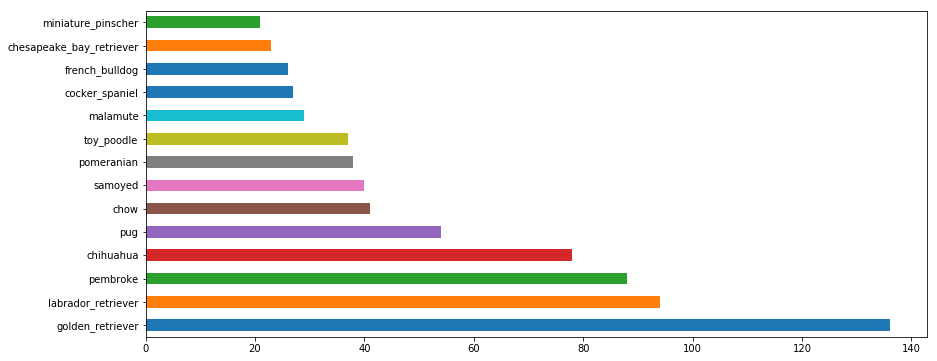

In [621]:
# Dog Preference - Algorithm P1

# Value counts to build a histogram.
dog_pref = df_viz[df_viz.p1_dog].p1.value_counts()

# Plotting only the breed's dog with more than 20 occurencies.
dog_pref[dog_pref > 20].plot(kind = 'barh', figsize = [14,6]);

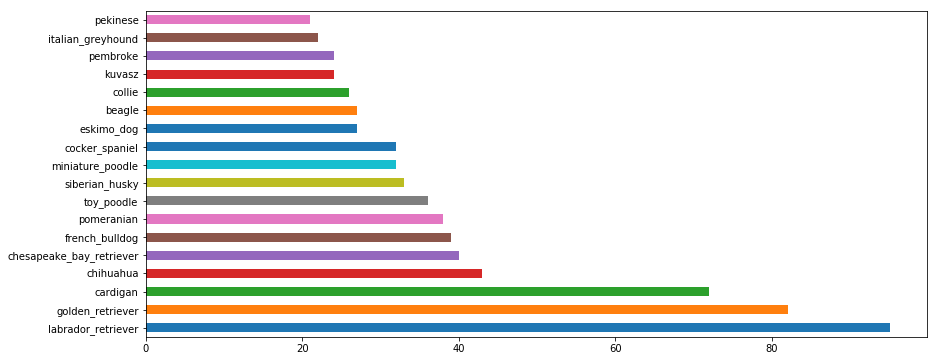

In [622]:
# Dog Preference - Algorithm P2

# Value counts to build a histogram.
dog_pref = df_viz[df_viz.p2_dog].p2.value_counts()

# Plotting only the breed's dog with more than 20 occurencies.
dog_pref[dog_pref > 20].plot(kind = 'barh', figsize = [14,6]);

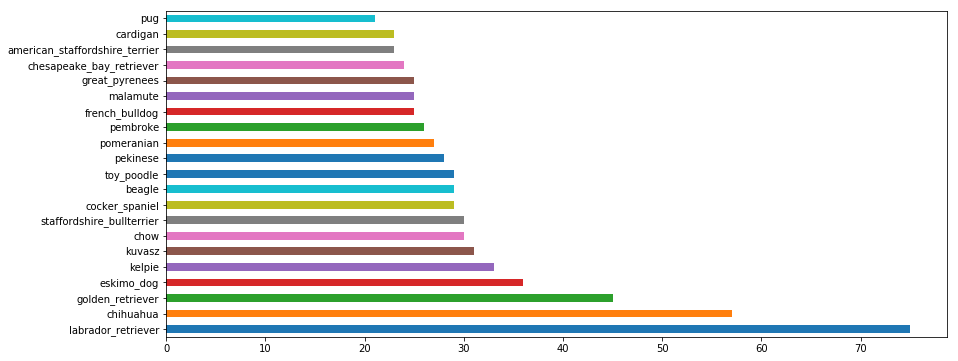

In [623]:
# Dog Preference - Algorithm P3

# Value counts to build a histogram.
dog_pref = df_viz[df_viz.p3_dog].p3.value_counts()

# Plotting only the breed's dog with more than 20 occurencies.
dog_pref[dog_pref > 20].plot(kind = 'barh', figsize = [14,6]);

Based on the graphic, the first algorithm has less breeds and high concentrated bars in some breeds, in opposite way the algorithm has much more breeds and the dogs are spread in more breeds.

In [664]:
# Calculating the percentages by algorithms.
p1_perc = round(100 * df_viz[df_viz.p1_dog].shape[0]/df_viz.shape[0],2)
p2_perc = round(100 * df_viz[df_viz.p2_dog].shape[0]/df_viz.shape[0],2)
p3_perc = round(100 * df_viz[df_viz.p3_dog].shape[0]/df_viz.shape[0],2)

# Printing a summary.
print("P1: {}%\nP2: {}%\nP3: {}%".format(p1_perc,p2_perc,p3_perc))

P1: 74.29%
P2: 75.15%
P3: 72.66%


All three algorithm has almost the same performance (percentage of picture classified as a dog):

* P1: 1462/1968 = 74.29%
* P2: 1479/1968 = 75.15%
* P3: 1420/1968 = 72.66%

The third one has a slight less performance.

In [679]:
# Calculating the number of breeds in each algorithm with more than 20 occurencies.
p1_qty = sum(df_viz[df_viz.p1_dog].p1.value_counts() > 20)
p2_qty = sum(df_viz[df_viz.p2_dog].p2.value_counts() > 20)
p3_qty = sum(df_viz[df_viz.p3_dog].p3.value_counts() > 20)

# Printing a summary of occurencies.
print("P1: {} breeds.\nP2: {} breeds.\nP3: {} breeds.".format(p1_qty,p2_qty,p3_qty))

P1: 14 breeds.
P2: 18 breeds.
P3: 21 breeds.


I have found a difference in the quantity of breeds with more than 20 occurencies.

* P1: 14 breeds
* P2: 18 breeds
* P3: 21 breeds

The third algorthm has 33.33% more breeds than the first algorithm.

In [680]:
# Calculating the number of dogs classified using the threshold of 20.
dog_qty_20_p1 = sum(df_viz[df_viz.p1_dog].p1.value_counts()[df_viz[df_viz.p1_dog].p1.value_counts() > 20])
dog_qty_20_p2 = sum(df_viz[df_viz.p2_dog].p2.value_counts()[df_viz[df_viz.p2_dog].p2.value_counts() > 20])
dog_qty_20_p3 = sum(df_viz[df_viz.p3_dog].p3.value_counts()[df_viz[df_viz.p3_dog].p3.value_counts() > 20])

# Printing a summary of occurencies.
print("P1: {} dogs.\nP2: {} dogs.\nP3: {} dogs.".format(dog_qty_20_p1,dog_qty_20_p2,dog_qty_20_p3))

P1: 732 dogs.
P2: 713 dogs.
P3: 671 dogs.


>**Conclusion:** The algorithm 1 is more skewess than the other two, and tend to concentrate the classification in few breeds. In other hand, the third algorithm is more generalist, spread the dogs in a more variety of breeds.

### Correlation Favorite and Reply

I want to see if there are a correlation between Favorite and Reply.

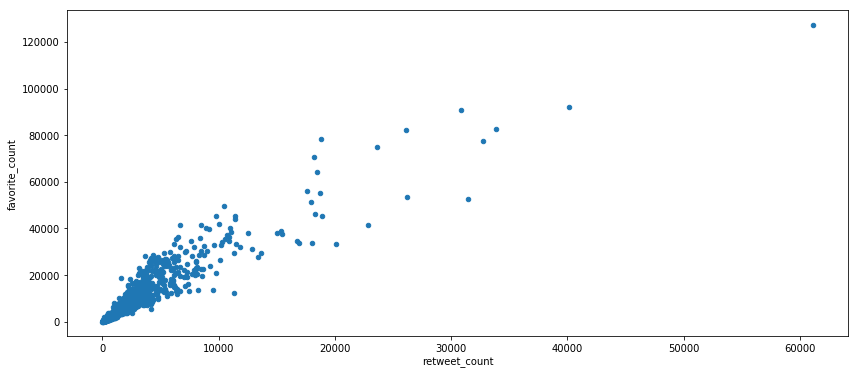

In [644]:
import matplotlib as plt
%matplotlib inline

teste = df_viz[np.logical_not(df_viz.retweet_count.isnull())]

df_viz.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter', figsize = [14,6])

## 6. References <a id='references'></a>

I have consulted this websites to perform this project. Have in mind, the list is not in appearance order.

* ND111 - Data Science Foundations II, Udacity, Nano degree, [website][ref_1];
* Roesslein, J.; tweepy, Version 3.7.0, [website][ref_2];
* Wickham, H.; Tidy Data, The Journal of Statistical Software, [article][ref_3];
* Twitter API, Documentation, [website][ref_4];
* Merging Tables, Pandas Package, [website][ref_5];
* logical_not, Numpy Package, Stack Overflow, [thread][ref_6];
* Reason to use zip code as string, Stack Overflow, [thread][ref_7];
* Data frames Concatenation, Pandas Package, Stack Overflow, [thread][ref_8];
* `.isin()`, Stack Overflow, [thread][ref_9];
* Indexing View vs Copy, Pandas Documentation, [website][ref_10];
* Regular Expression in Python, Guru99, [website][ref_11];
* Concise Vector Adding, Stack Overflow, [thread][ref_12];




[ref_1]: https://br.udacity.com/course/fundamentos-data-science-ii--nd111
[ref_2]: https://tweepy.readthedocs.io/en/3.7.0/index.html
[ref_3]: http://www.jstatsoft.org/v59/i10/
[ref_4]: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline
[ref_5]: https://pandas.pydata.org/pandas-docs/stable/merging.html
[ref_6]: https://stackoverflow.com/questions/7030831/how-do-i-get-the-opposite-negation-of-a-boolean-in-python/7030846
[ref_7]: https://stackoverflow.com/questions/893454/is-it-a-good-idea-to-use-an-integer-column-for-storing-us-zip-codes-in-a-databas
[ref_8]: https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe
[ref_9]: https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values
[ref_10]: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[ref_11]: https://www.guru99.com/python-regular-expressions-complete-tutorial.html
[ref_12]: https://stackoverflow.com/questions/845112/concise-vector-adding-in-python




***

## Appendix <a id='appendix'></a>

### A.1. JSON file

I have indented this fragment of JSON file, just to understand what is the components. Later it will help me to subset/indexing my needs.

See more in [Twitter Dev Website][twt_dev_wb].

[twt_dev_wb]: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline

The object from the tweepy has an outcome a dictionary called `_json`, which is what I am looking for.

```JSON
Status(_api=<tweepy.api.API object at 0x0B288EF0>,
_json={'created_at': 'Wed Dec 26 19:18:12 +0000 2018',
       'id': 1078007085848240129,
       'id_str': '1078007085848240129',
       'text': '@brandimotamedi i hope you love it ☺️',
       'truncated': False,
       'entities': {'hashtags': [],
                    'symbols': [],
                    'user_mentions': [{'screen_name':
                                       'brandimotamedi',
                                       'name': 'Brandi Motamedi',
                                       'id': 344164849,
                                       'id_str': '344164849',
                                       'indices': [0, 15]}],
                    'urls': []},
       'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       'in_reply_to_status_id': 1078006885935067136,
       'in_reply_to_status_id_str': '1078006885935067136',
       'in_reply_to_user_id': 344164849,
       'in_reply_to_user_id_str': '344164849',
       'in_reply_to_screen_name': 'brandimotamedi',
       'user': {'id': 4196983835,
                'id_str': '4196983835',
                'name': 'WeRateDogs™',
                'screen_name': 'dog_rates',
                'location': 'merch  ⇨',
                'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
                'url': 'https://t.co/N7sNNHAEXS',
                'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
                                                      'expanded_url': 'http://weratedogs.com',
                                                      'display_url': 'weratedogs.com',
                                                      'indices': [0, 23]}]},
                                    'description': {'urls': []}},
                'protected': False,
                'followers_count': 7549717,
                'friends_count': 12,
                'listed_count': 5661,
                'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
                'favourites_count': 140650,
                'utc_offset': None,
                'time_zone': None,
                'geo_enabled': True,
                'verified': True,
                'statuses_count': 9467,
                'lang': 'en',
                'contributors_enabled': False,
                'is_translator': False,
                'is_translation_enabled': False,
                'profile_background_color': '000000',
                'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                'profile_background_tile': False,
                'profile_image_url': 'http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
                'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
                'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1544368760',
                'profile_link_color': 'F5ABB5',
                'profile_sidebar_border_color': '000000',
                'profile_sidebar_fill_color': '000000',
                'profile_text_color': '000000',
                'profile_use_background_image': False,
                'has_extended_profile': False,
                'default_profile': False,
                'default_profile_image': False,
                'following': False,
                'follow_request_sent': False,
                'notifications': False,
                'translator_type': 'none'},
       'geo': None,
       'coordinates': None,
       'place': None,
       'contributors': None,
       'is_quote_status': False,
       'retweet_count': 0,
       'favorite_count': 115,
       'favorited': False,
       'retweeted': False,
       'lang': 'en'},
created_at=datetime.datetime(2018, 12, 26, 19, 18, 12),
id=1078007085848240129,
id_str='1078007085848240129',
text='@brandimotamedi i hope you love it ☺️',
truncated=False,
entities={'hashtags': [],
          'symbols': [],
          'user_mentions': [{'screen_name': 'brandimotamedi',
                             'name': 'Brandi Motamedi',
                             'id': 344164849,
                             'id_str': '344164849',
                             'indices': [0, 15]}],
          'urls': []},
source='Twitter for iPhone',
source_url='http://twitter.com/download/iphone',
in_reply_to_status_id=1078006885935067136,
in_reply_to_status_id_str='1078006885935067136',
in_reply_to_user_id=344164849,
in_reply_to_user_id_str='344164849',
in_reply_to_screen_name='brandimotamedi',
author=User(_api=<tweepy.api.API object at 0x0B288EF0>,
            _json={'id': 4196983835,
                   'id_str': '4196983835',
                   'name': 'WeRateDogs™',
                   'screen_name': 'dog_rates',
                   'location': 'merch  ⇨', 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
                   'url': 'https://t.co/N7sNNHAEXS',
                   'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
                                                         'expanded_url': 'http://weratedogs.com',
                                                         'display_url': 'weratedogs.com',
                                                         'indices': [0, 23]}]},
                                       'description': {'urls': []}},
                   'protected': False,
                   'followers_count': 7549717,
                   'friends_count': 12,
                   'listed_count': 5661,
                   'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
                   'favourites_count': 140650,
                   'utc_offset': None,
                   'time_zone': None,
                   'geo_enabled': True,
                   'verified': True,
                   'statuses_count': 9467,
                   'lang': 'en',
                   'contributors_enabled': False,
                   'is_translator': False,
                   'is_translation_enabled': False,
                   'profile_background_color': '000000',
                   'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                   'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                   'profile_background_tile': False,
                   'profile_image_url': 'http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
                   'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
                   'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1544368760',
                   'profile_link_color': 'F5ABB5',
                   'profile_sidebar_border_color': '000000',
                   'profile_sidebar_fill_color': '000000',
                   'profile_text_color': '000000',
                   'profile_use_background_image': False,
                   'has_extended_profile': False,
                   'default_profile': False,
                   'default_profile_image': False,
                   'following': False,
                   'follow_request_sent': False,
                   'notifications': False,
                   'translator_type': 'none'},
            id=4196983835,
            id_str='4196983835',
            name='WeRateDogs™',
            screen_name='dog_rates',
            location='merch  ⇨',
            description='Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
            url='https://t.co/N7sNNHAEXS',
            entities={'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
                                               'expanded_url': 'http://weratedogs.com',
                                               'display_url': 'weratedogs.com',
                                               'indices': [0, 23]}]},
                             'description': {'urls': []}},
            protected=False,
            followers_count=7549717,
            friends_count=12,
            listed_count=5661,
            created_at=datetime.datetime(2015, 11, 15, 21, 41, 29),
            favourites_count=140650,
            utc_offset=None,
            time_zone=None,
            geo_enabled=True,
            verified=True,
            statuses_count=9467,
            lang='en',
            contributors_enabled=False,
            is_translator=False,
            is_translation_enabled=False,
            profile_background_color='000000',
            profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png',
            profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png',
            profile_background_tile=False,
            profile_image_url='http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
            profile_image_url_https='https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
            profile_banner_url='https://pbs.twimg.com/profile_banners/4196983835/1544368760',
            profile_link_color='F5ABB5',
            profile_sidebar_border_color='000000',
            profile_sidebar_fill_color='000000',
            profile_text_color='000000',
            profile_use_background_image=False,
            has_extended_profile=False,
            default_profile=False,
            default_profile_image=False,
            following=False,
            follow_request_sent=False,
            notifications=False, translator_type='none'),
user=User(_api=<tweepy.api.API object at 0x0B288EF0>,
          _json={'id': 4196983835,
                 'id_str': '4196983835',
                 'name': 'WeRateDogs™',
                 'screen_name': 'dog_rates',
                 'location': 'merch  ⇨',
                 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
                 'url': 'https://t.co/N7sNNHAEXS',
                 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
                                                'expanded_url': 'http://weratedogs.com',
                                                'display_url': 'weratedogs.com',
                                                'indices': [0, 23]}]},
                                     'description': {'urls': []}},
                             'protected': False,
                             'followers_count': 7549717,
                             'friends_count': 12,
                             'listed_count': 5661,
                             'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
                             'favourites_count': 140650,
                             'utc_offset': None,
                             'time_zone': None,
                             'geo_enabled': True,
                             'verified': True,
                             'statuses_count': 9467,
                             'lang': 'en',
                             'contributors_enabled': False,
                             'is_translator': False,
                             'is_translation_enabled': False,
                             'profile_background_color': '000000',
                             'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                             'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                             'profile_background_tile': False,
                             'profile_image_url': 'http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
                             'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
                             'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1544368760',
                             'profile_link_color': 'F5ABB5',
                             'profile_sidebar_border_color': '000000',
                             'profile_sidebar_fill_color': '000000',
                             'profile_text_color': '000000',
                             'profile_use_background_image': False,
                             'has_extended_profile': False,
                             'default_profile': False,
                             'default_profile_image': False,
                             'following': False,
                             'follow_request_sent': False,
                             'notifications': False,
                             'translator_type': 'none'},
          id=4196983835,
          id_str='4196983835',
          name='WeRateDogs™',
          screen_name='dog_rates',
          location='merch  ⇨',
          description='Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
          url='https://t.co/N7sNNHAEXS',
          entities={'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
                                             'expanded_url': 'http://weratedogs.com',
                                             'display_url': 'weratedogs.com',
                                             'indices': [0, 23]}]},
                            'description': {'urls': []}},
          protected=False,
          followers_count=7549717,
          friends_count=12,
          listed_count=5661,
          created_at=datetime.datetime(2015, 11, 15, 21, 41, 29),
          favourites_count=140650,
          utc_offset=None,
          time_zone=None,
          geo_enabled=True,
          verified=True,
          statuses_count=9467,
          lang='en',
          contributors_enabled=False,
          is_translator=False,
          is_translation_enabled=False,
          profile_background_color='000000',
          profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png',
          profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png',
          profile_background_tile=False,
          profile_image_url='http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
          profile_image_url_https='https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg',
          profile_banner_url='https://pbs.twimg.com/profile_banners/4196983835/1544368760',
          profile_link_color='F5ABB5',
          profile_sidebar_border_color='000000',
          profile_sidebar_fill_color='000000',
          profile_text_color='000000',
          profile_use_background_image=False,
          has_extended_profile=False,
          default_profile=False,
          default_profile_image=False,
          following=False,
          follow_request_sent=False,
          notifications=False,
          translator_type='none'),
geo=None,
coordinates=None,
place=None,
contributors=None,
is_quote_status=False,
retweet_count=0,
favorite_count=115,
favorited=False,
retweeted=False,
lang='en')
```
***